In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('train.csv')

# Quick overview
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
# checking for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
# Handling missing data

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop Cabin if it exists
if 'Cabin' in df.columns:
    df.drop(columns='Cabin', inplace=True)

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
# Check for any remaining missing values
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())

# Display the first few rows of the cleaned data
print("\nPreview of cleaned data:\n")
print(df.head())


Missing values after cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Preview of cleaned data:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0     

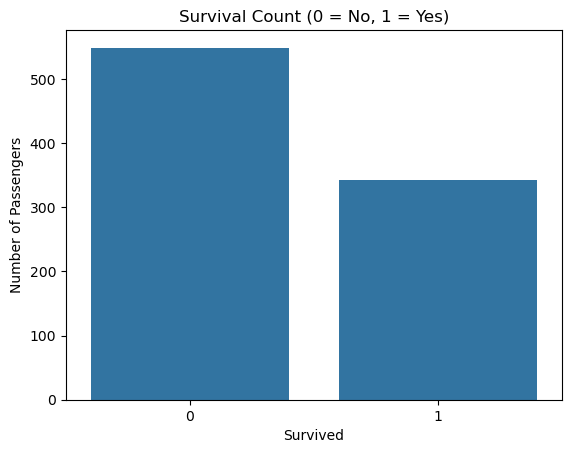

In [22]:
# Let's see how many passengers survived vs didn't survive
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

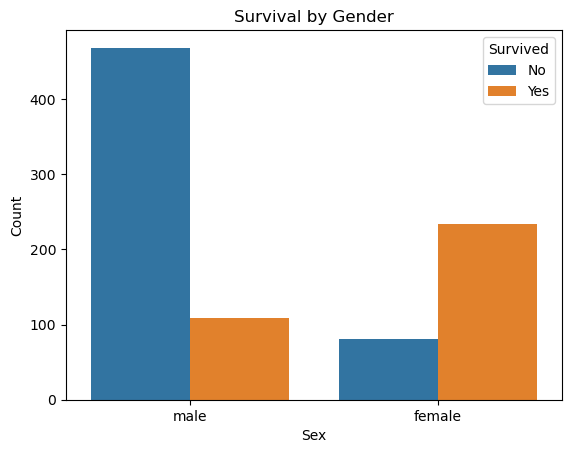

In [24]:
# Check survival count based on gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

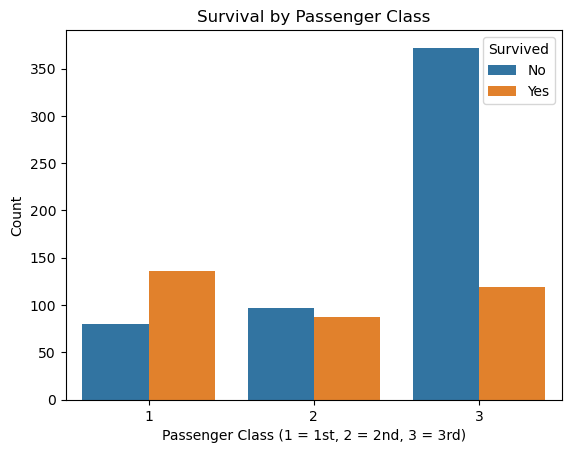

In [26]:
# Were first class passengers more likely to survive?
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

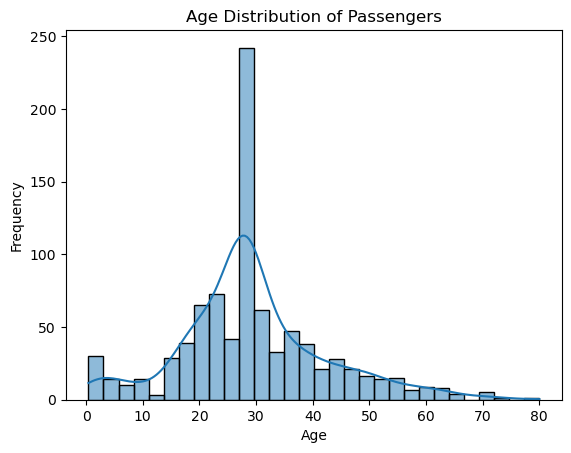

In [28]:
# Let's look at the age distribution of passengers
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

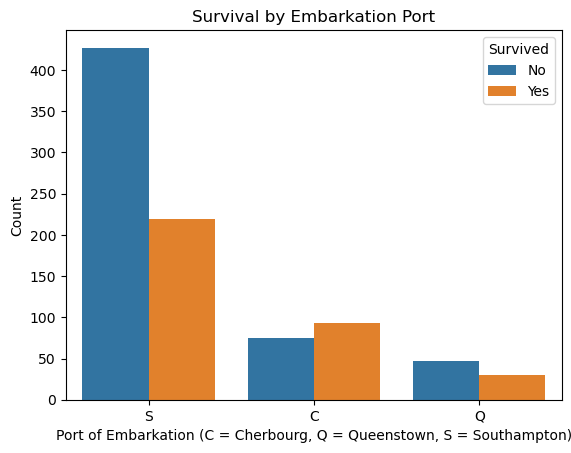

In [32]:
# Check survival rate based on embarkation port
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

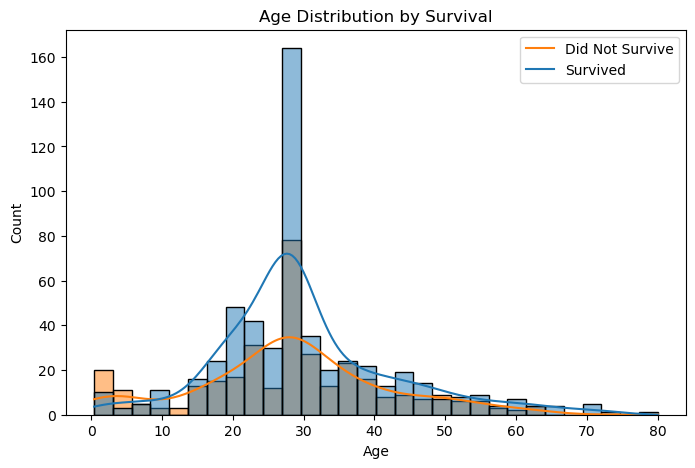

In [36]:
# Age distribution and survival
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

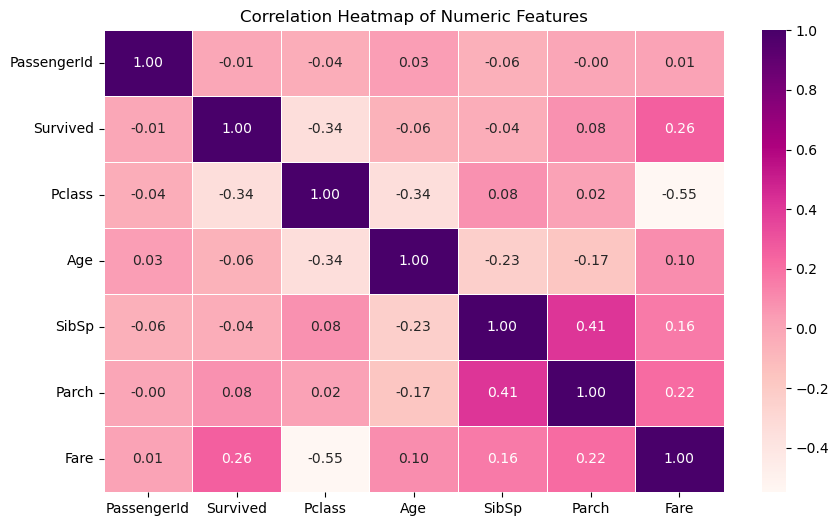

In [44]:
#CORRELATION HEATMAP
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Draw correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

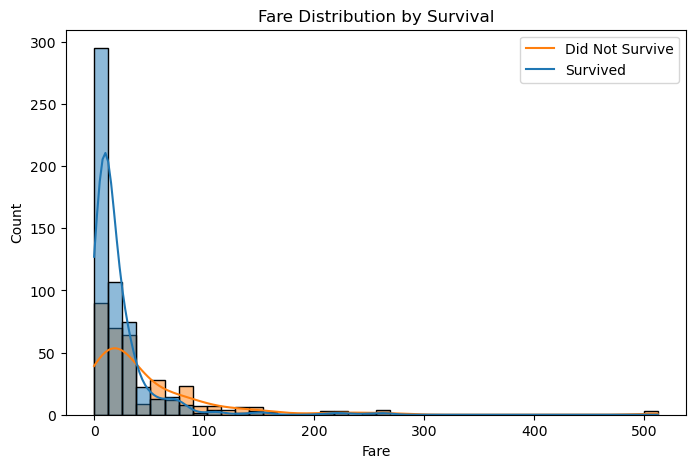

In [62]:
# Fare distribution by survival
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Fare', hue='Survived', bins=40, kde=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()

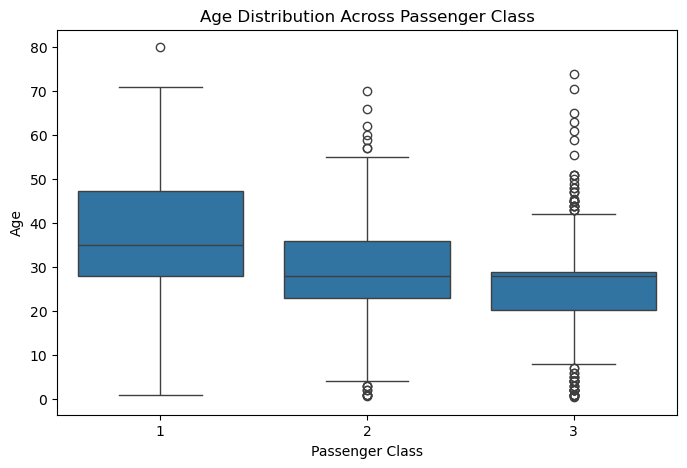

In [64]:
# Age distribution across Pclass
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution Across Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

<Figure size 800x500 with 0 Axes>

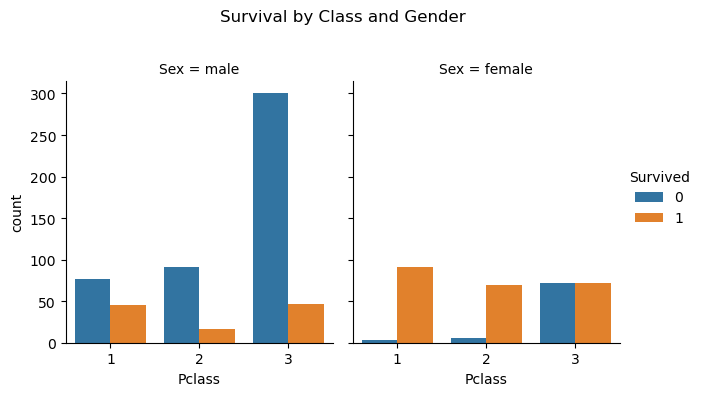

In [66]:
# Pclass and Sex vs Survival
plt.figure(figsize=(8, 5))
sns.catplot(x='Pclass', hue='Survived', col='Sex', data=df, kind='count', height=4, aspect=0.8)
plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Class and Gender')
plt.show()

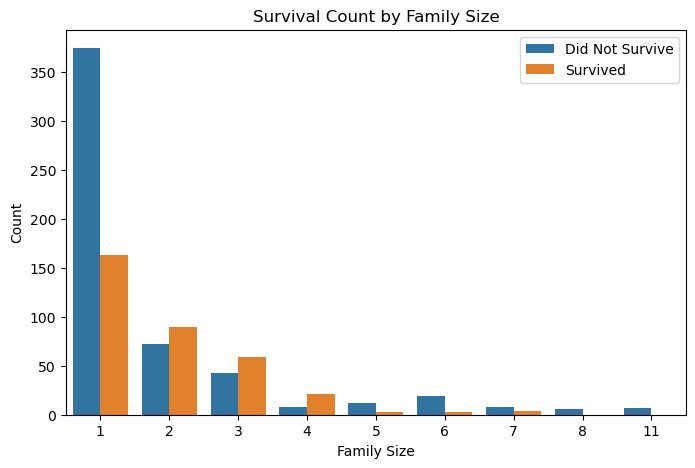

In [68]:
# Create new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Family size vs survival
plt.figure(figsize=(8, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(labels=['Did Not Survive', 'Survived'])
plt.show()